<a href="https://colab.research.google.com/github/vineetnayak777/DataAnalytics_ANZ/blob/master/VineetPredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Analysis

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Importing dataset and performing feature selection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_excel("/ANZ.xlsx")

In [ ]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
# selecting important featuers
data=data[["customer_id","age","txn_description","balance","amount"]]

In [8]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [9]:
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [10]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53.0,2275.852055,222.862603
1,CUS-1117979751,21.0,9829.929000,339.843700
2,CUS-1140341822,28.0,5699.212250,212.632500
3,CUS-1147642491,34.0,9032.841186,245.600169
4,CUS-1196156254,34.0,22272.433755,147.145796


### Finding out the mean salary of each customer

In [11]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [12]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


### Create some plots to analyze relation between existing data

In [13]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73


### Salary v/s Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


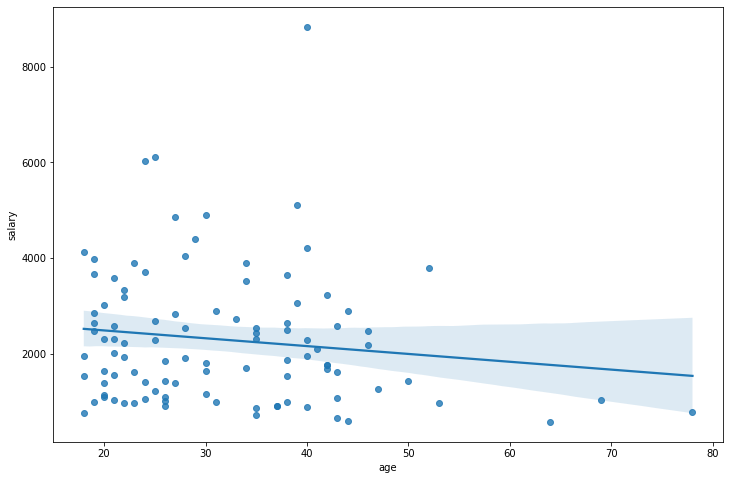

In [14]:
plt.figure(figsize=(12, 8))
sns.regplot("age", "salary", data=plot_data)

### Salary v/s Account Balance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


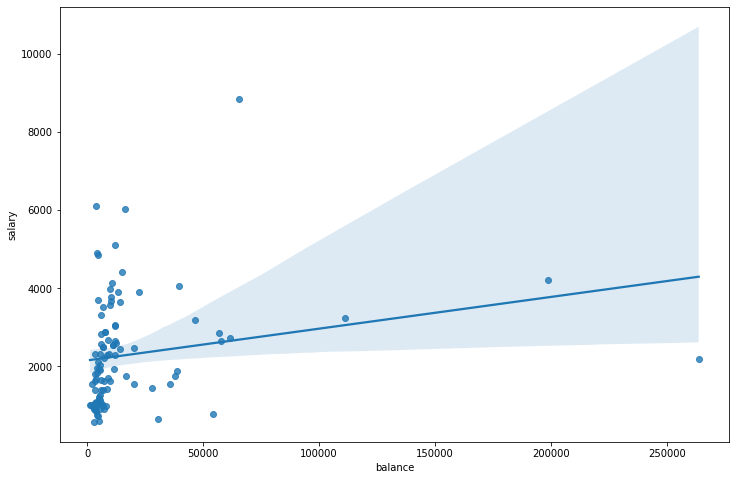

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data)

### Salary v/s Transaction Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


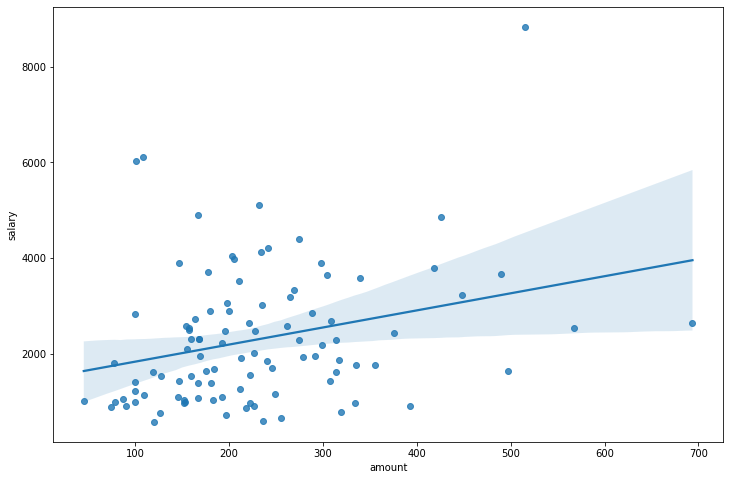

In [16]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "salary", fit_reg=True, data=plot_data)

# Data Preparation

## Feature Generation

### Mean POS (Point of Sale) for each customer

In [17]:
# POS indicates spending behavior of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [18]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [19]:
len(pos)

100

### Mean payment made by the customer

In [20]:
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [21]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [22]:
len(payment)

100

### Mean Inter-bank transfer by each customer

In [23]:
interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})

In [24]:
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [25]:
len(interbank)

68

### Mean phone transaction made by the customer

In [26]:
#Banking via phone/online pay

phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [27]:
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [28]:
len(phonebank)

16

## 

## Merging relevant dataframes

In [29]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53.0,2275.852055
1,CUS-1117979751,21.0,9829.929000
2,CUS-1140341822,28.0,5699.212250
3,CUS-1147642491,34.0,9032.841186
4,CUS-1196156254,34.0,22272.433755


In [30]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [31]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73


## Feature selection for new features

### Payment v/s Salary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


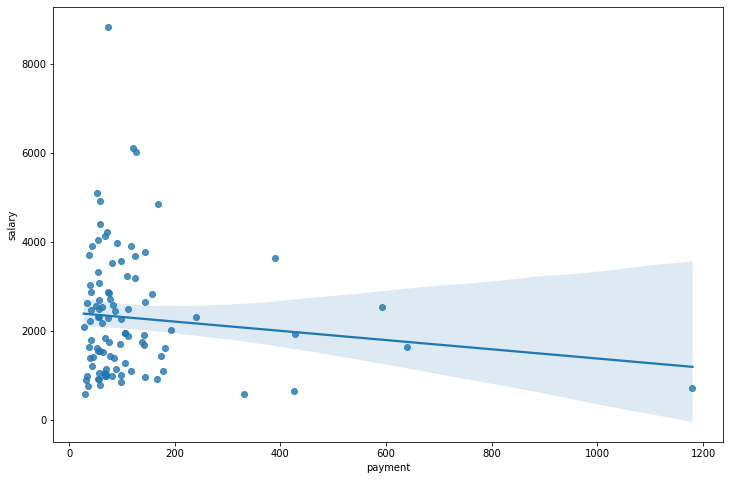

In [32]:
plt.figure(figsize=(12, 8))
sns.regplot("payment", "salary", fit_reg=True, data=df)

### Salary vs Point Of Sale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


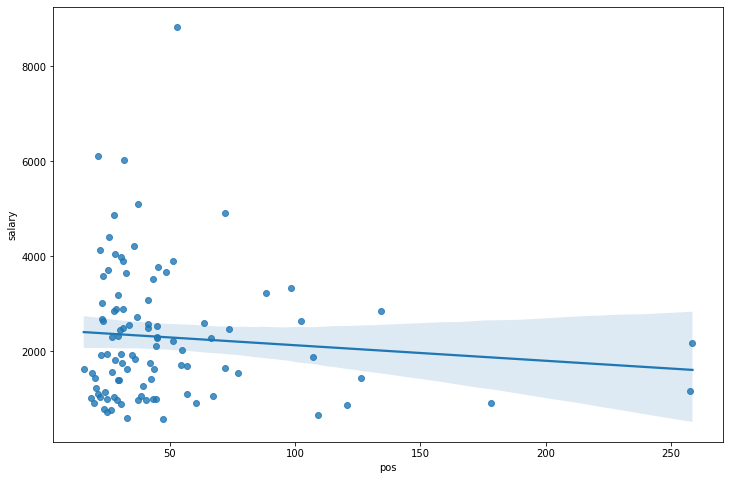

In [33]:
plt.figure(figsize=(12, 8))
sns.regplot("pos", "salary", fit_reg=True, data=df)

# Model building and predictive analytics

## Supervised models

### Linear Regression Model

In [34]:
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)
lr.score(X, y)

0.11930439490077782

In [38]:
y_pred=lr.predict(X_test)

In [39]:
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715894


In [40]:
# Sample prediction values

print("The model predicts salary will be=")
print(lr.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855507


### Decision Tree Regressor

In [41]:
dt = DecisionTreeRegressor()

In [42]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [43]:
dt.predict(X_test)

array([ 917.45, 2639.76, 3517.61, 2572.91, 3071.14, 3649.51, 1916.51,
        917.45, 2280.36, 1272.47,  576.  , 2887.34, 3026.95, 2639.76,
       3676.94, 2718.51, 1099.7 , 3676.94, 4910.9 , 3517.61])

In [44]:
dt.score(X_test, y_test)

-0.024879327240309168

In [45]:
# Sample prediction values

print("The model predicts salary will be=")
print(dt.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
917.45


## Unsupervised Models

### Segmentation using K-Means Clustering

In [46]:
df

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35.0,4497.557069,1180.000000,25.022143,725.32
96,CUS-809013380,21.0,3756.902903,70.136364,22.255098,1037.07
97,CUS-860700529,30.0,3462.276009,41.933333,28.164845,1808.62
98,CUS-880898248,26.0,8528.830385,77.500000,20.101429,1433.98


In [47]:
X=df[["age","balance","payment","pos","salary"]]
X.shape

(100, 5)

In [48]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

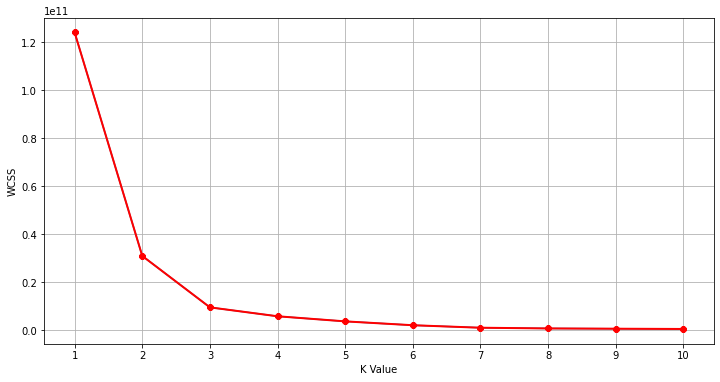

In [49]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [50]:
km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
df["label"] = clusters

In [51]:
df

,customer_id,age,balance,payment,pos,salary,label
0,CUS-1005756958,53.0,2275.852055,144.000000,28.769615,970.47,0
1,CUS-1117979751,21.0,9829.929000,98.925000,23.321923,3578.65,0
2,CUS-1140341822,28.0,5699.212250,142.000000,34.781282,1916.51,0
3,CUS-1147642491,34.0,9032.841186,96.185185,54.271316,1711.39,0
4,CUS-1196156254,34.0,22272.433755,43.100000,31.157432,3903.73,0
...,...,...,...,...,...,...,...
95,CUS-72755508,35.0,4497.557069,1180.000000,25.022143,725.32,0
96,CUS-809013380,21.0,3756.902903,70.136364,22.255098,1037.07,0
97,CUS-860700529,30.0,3462.276009,41.933333,28.164845,1808.62,0
98,CUS-880898248,26.0,8528.830385,77.500000,20.101429,1433.98,0


In [52]:
print("Fist Group: ")
print(" ")
print(df[df["label"]==0])

Fist Group: 
 
       customer_id   age       balance      payment        pos   salary  label
0   CUS-1005756958  53.0   2275.852055   144.000000  28.769615   970.47      0
1   CUS-1117979751  21.0   9829.929000    98.925000  23.321923  3578.65      0
2   CUS-1140341822  28.0   5699.212250   142.000000  34.781282  1916.51      0
3   CUS-1147642491  34.0   9032.841186    96.185185  54.271316  1711.39      0
4   CUS-1196156254  34.0  22272.433755    43.100000  31.157432  3903.73      0
..             ...   ...           ...          ...        ...      ...    ...
95    CUS-72755508  35.0   4497.557069  1180.000000  25.022143   725.32      0
96   CUS-809013380  21.0   3756.902903    70.136364  22.255098  1037.07      0
97   CUS-860700529  30.0   3462.276009    41.933333  28.164845  1808.62      0
98   CUS-880898248  26.0   8528.830385    77.500000  20.101429  1433.98      0
99   CUS-883482547  19.0   9877.452697    91.446809  30.635098  3977.46      0

[87 rows x 7 columns]


In [53]:
print("Second Group: ")
print(" ")
print(df[df["label"]==1])

Second Group: 
 
       customer_id   age        balance    payment         pos   salary  label
43  CUS-2370108457  46.0  263753.766119  61.750000  258.643636  2179.96      1
91   CUS-527400765  40.0  198565.143775  72.216216   35.570500  4216.04      1


In [54]:
print("Third Group: ")
print(" ")
print(df[df["label"]==2])

Third Group: 
 
       customer_id   age        balance     payment         pos   salary  \
17  CUS-1609060617  19.0   56685.795802   75.454545  134.343000  2854.74   
21  CUS-1646183815  78.0   54240.641471   58.437500   23.736667   782.42   
27  CUS-1816693151  40.0   65420.404231   73.567568   52.825455  8835.98   
33  CUS-2059096722  21.0   35816.951949   58.914286   27.022973  1560.20   
53  CUS-2663907001  28.0   39427.873576   55.192771   28.165200  4054.77   
57  CUS-2819545904  42.0  111300.797619  109.800000   88.541818  3231.26   
60  CUS-3117610635  33.0   61491.350647   76.863636   36.737391  2718.51   
63  CUS-3151318058  42.0   37842.077755   75.684211   30.715000  1757.82   
67  CUS-3249305314  38.0   38687.672843  111.214286  107.296250  1880.95   
77  CUS-3462882033  22.0   46338.733837  124.500000   29.371304  3195.01   
87   CUS-495599312  38.0   57566.579032  144.500000  102.412500  2647.38   

    label  
17      2  
21      2  
27      2  
33      2  
53      2  